In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose_hiive as mlrose
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

#Random State
rs = 614

In [2]:
class Data():
    def dataAllocation(self, path):
        df = pd.read_csv(path)
        x_data = df.iloc[:, :-1]
        y_data = df.iloc[:, -1 ]
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = rs, shuffle = True)
        return x_train, x_test, y_train, y_test

In [3]:
dataset = Data()
x1_data,y1_data = dataset.dataAllocation('data/pima-indians-diabetes.csv')
x1_train, x1_test, y1_train, y1_test = dataset.trainSets(x1_data,y1_data)
scaler = StandardScaler()
scaled_x1_train = scaler.fit_transform(x1_train)
scaled_x1_test = scaler.transform(x1_test)

In [4]:
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']

In [5]:
results = []
for algorithm in algorithms:
    for i in range(1, 3000, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        
        if algorithm == 'genetic_alg' and i > 600:
            break

        if i % 100 == 1:
            print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])

[1, 'random_hill_climb', 0.521415270018622, 0.49783549783549785, 0.38947368421052625]
[101, 'random_hill_climb', 0.6089385474860335, 0.6190476190476191, 0.4358974358974359]
[201, 'random_hill_climb', 0.7411545623836127, 0.7056277056277056, 0.5342465753424657]
[301, 'random_hill_climb', 0.7653631284916201, 0.7272727272727273, 0.5190839694656489]
[401, 'random_hill_climb', 0.7839851024208566, 0.7532467532467533, 0.6013986013986014]
[501, 'random_hill_climb', 0.7914338919925512, 0.7445887445887446, 0.593103448275862]
[601, 'random_hill_climb', 0.7914338919925512, 0.7229437229437229, 0.5675675675675677]
[701, 'random_hill_climb', 0.7951582867783985, 0.7359307359307359, 0.5793103448275863]
[801, 'random_hill_climb', 0.7932960893854749, 0.7316017316017316, 0.5507246376811594]
[901, 'random_hill_climb', 0.8044692737430168, 0.7316017316017316, 0.5507246376811594]
[1001, 'random_hill_climb', 0.8026070763500931, 0.7359307359307359, 0.5611510791366906]
[1101, 'random_hill_climb', 0.80819366852886

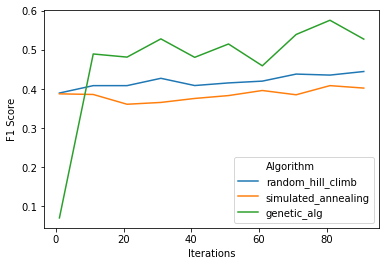

In [66]:
sns.lineplot(data=df, x="Iterations", y="F1 Score", hue="Algorithm")

In [68]:
df.to_csv("nn_opts.csv", index=False)